In [17]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
from urllib import request
plt.rcParams["figure.figsize"] = [10, 6]

url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL"
res = request.urlopen(url).read()
data = json.loads(res)

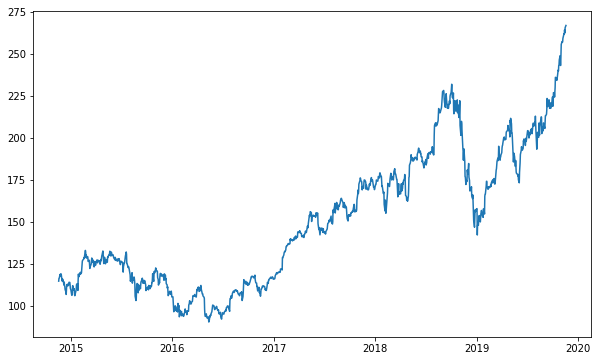

In [18]:
apple_prices = [d["close"] for d in data["historical"]]
apple_dates = [datetime.strptime(d["date"], "%Y-%m-%d")
               for d in data["historical"]]
plt.plot(apple_dates, apple_prices)

In [19]:
from statistics import mean
def moving_average(data, s, e, r):
    avgs = []
    for i in range(s, min(e, len(data))):
        a = max(0, i-r)
        b = min(len(data), i+r+1)
        avgs.append(mean(data[a:b]))
    return avgs


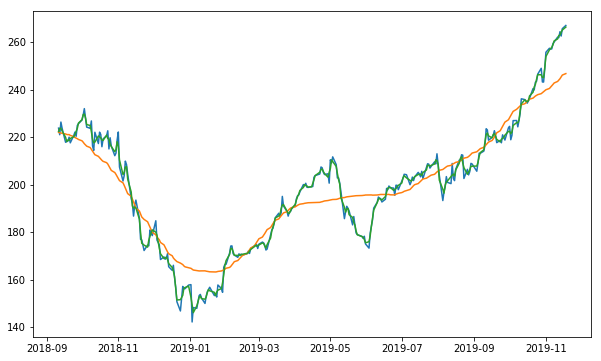

In [20]:
apd = apple_dates[-300:]
app = apple_prices[-300:]
plt.plot(apd, app)
plt.plot(apd, moving_average(app, 0, len(app), 30))
plt.plot(apd, moving_average(app, 0, len(app), 1))

In [21]:
bigapp = apple_prices*100

In [22]:
%%time
avgs1 = moving_average(bigapp, 0, len(bigapp), 30)

CPU times: user 12.4 s, sys: 15.9 ms, total: 12.4 s
Wall time: 12.4 s


In [23]:
%%time
from multiprocessing import Pool

slice_size = 200

if __name__ == "__main__":
  pool = Pool(4)
  avgs2 = [r for res in pool.starmap(moving_average,
                                   [(bigapp, i, i + slice_size, 30)
                                    for i in range(0, len(bigapp), slice_size)]) for r in res]
print(avgs2[:5])
print("The results avgs1 and avgs2 are identical:", avgs1 == avgs2)

[113.23354838709677, 113.015625, 112.85606060606061, 112.82764705882353, 112.80428571428571]
The results avgs1 and avgs2 are identical: True
CPU times: user 139 ms, sys: 60.2 ms, total: 199 ms
Wall time: 3.52 s
